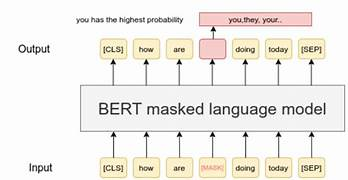

# Masked Language Modeling (MLM)
# BERT Transformer


In [17]:
!pip install transformers

DEPRECATION: Loading egg at c:\users\91956\anaconda3\lib\site-packages\gscraper-0.0.1-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


# Expectations
# Objective

**Pass the masked sentences into the  MLM model and verify that the unmasked sentences yield the expected results.**

# input ===> masked_sentences = "Paris is the [MASK] of France"
# output ===> unmasked_sentences= 'Paris is the capital of France'

# 1 . Import Python Modules

In [18]:
from transformers import BertTokenizer, BertForMaskedLM
import torch
import numpy as np

# 2 .Load pre trained models

In [19]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
mlm_model = BertForMaskedLM.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'bert.pooler.dense.bias', 'cls.seq_relationship.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [20]:
print(mlm_model)

BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_a

In [21]:
print(tokenizer)

BertTokenizer(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)


# 3. Input Text

## 3.1 Token

In [22]:
masked_sentences = "Paris is the [MASK] of France"

spl_tokenized_text = tokenizer.tokenize("[CLS] " + masked_sentences + " [SEP]")
print(spl_tokenized_text)

['[CLS]', 'paris', 'is', 'the', '[MASK]', 'of', 'france', '[SEP]']


## 3.2 Index/Ids

In [23]:
indexed_tokens = tokenizer.convert_tokens_to_ids(spl_tokenized_text)
indexed_tokens

[101, 3000, 2003, 1996, 103, 1997, 2605, 102]

## 3.3 Mask Ids

In [24]:
mask_ids = [1]*len(indexed_tokens)
mask_ids

[1, 1, 1, 1, 1, 1, 1, 1]

## 3.4 Convert to Tensor

In [25]:
ids_tensor = torch.tensor([indexed_tokens])
mask_tensor = torch.tensor([mask_ids])
print(ids_tensor)
print(mask_tensor)

tensor([[ 101, 3000, 2003, 1996,  103, 1997, 2605,  102]])
tensor([[1, 1, 1, 1, 1, 1, 1, 1]])


# 4. MLM Model

In [26]:
outputs = mlm_model(ids_tensor, mask_tensor)
outputs[0].shape

torch.Size([1, 8, 30522])

In [27]:
logits = outputs.logits

# Identify the index of the masked token
masked_index = spl_tokenized_text.index('[MASK]')

# Extract the logits for the masked token position
masked_token_logits = logits[0, masked_index, :]

# Get the predicted token ID (the token with the highest logit)
predicted_token_id = torch.argmax(masked_token_logits).item()

# Convert the predicted token ID back to a token
predicted_token = tokenizer.convert_ids_to_tokens(predicted_token_id)

print(f"Predicted token: {predicted_token}")

Predicted token: capital


# 5. Final Output/Outcome

In [28]:
unmasked_sentences=masked_sentences.replace("[MASK]",predicted_token )
unmasked_sentences

'Paris is the capital of France'